In [350]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import data_cleaning_visualization as cv
cleaner=cv.DataCleaningAndVisualization()
import numpy as np

In [351]:
df = pd.read_csv('first inten project.csv')

# **EDA**

In [352]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [353]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,Booking_ID,object,36285,0,"[INN00001, INN24194, INN24188, INN24189, INN24...",0
1,number of adults,int64,5,0,"[2, 1, 3, 0, 4]",0
2,number of children,int64,6,0,"[0, 1, 2, 3, 9, 10]",0
3,number of weekend nights,int64,8,0,"[0, 1, 2, 3, 4, 5, 6, 7]",0
4,number of week nights,int64,18,0,"[2, 1, 3, 4, 0, 5, 6, 7, 10, 8]",0
5,type of meal,object,4,0,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",0
6,car parking space,int64,2,0,"[0, 1]",0
7,room type,object,7,0,"[Room_Type 1, Room_Type 4, Room_Type 6, Room_T...",0
8,lead time,int64,352,0,"[0, 1, 2, 3, 4, 5, 6, 8, 7, 12]",0
9,market segment type,object,5,0,"[Online, Offline, Corporate, Complementary, Av...",0


In [354]:
df.drop(["Booking_ID"], axis=1, inplace=True)

In [355]:
df.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [356]:
df.columns = df.columns.str.strip()
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [357]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price', 'special requests'],
      dtype='object')

In [358]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,number of adults,int64,5,0,"[2, 1, 3, 0, 4]",10276
1,number of children,int64,6,0,"[0, 1, 2, 3, 9, 10]",10276
2,number of weekend nights,int64,8,0,"[0, 1, 2, 3, 4, 5, 6, 7]",10276
3,number of week nights,int64,18,0,"[2, 1, 3, 4, 0, 5, 6, 7, 10, 8]",10276
4,type of meal,object,4,0,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",10276
5,car parking space,int64,2,0,"[0, 1]",10276
6,room type,object,7,0,"[Room_Type 1, Room_Type 4, Room_Type 6, Room_T...",10276
7,lead time,int64,352,0,"[0, 1, 2, 3, 4, 5, 6, 8, 7, 12]",10276
8,market segment type,object,5,0,"[Online, Offline, Corporate, Complementary, Av...",10276
9,repeated,int64,2,0,"[0, 1]",10276


In [359]:
from dateutil import parser
import pandas as pd

# Function to parse dates with mixed formats
def parse_dates(date_str):
    try:
        return parser.parse(date_str)
    except ValueError:
        return pd.NaT

# Apply the function to parse the date column
df['date of reservation'] = df['date of reservation'].apply(parse_dates)

# Drop rows with unparseable dates
df_encoded = df.dropna(subset=['date of reservation'])

# Extract year, month, and day information using .loc to avoid SettingWithCopyWarning
df.loc[:, 'reservation_year'] = df['date of reservation'].dt.year
df.loc[:, 'reservation_month'] = df['date of reservation'].dt.month
df.loc[:, 'reservation_day'] = df['date of reservation'].dt.day

# Drop the original date column as we have extracted useful features from it
df = df.drop(columns=['date of reservation'])

# Display the first few rows of the dataframe to verify the changes
df.head()


,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,reservation_year,reservation_month,reservation_day
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2015.0,10.0,2.0
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018.0,11.0,6.0
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2018.0,2.0,28.0
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,2017.0,5.0,20.0
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,2018.0,4.0,11.0


In [360]:
df.isnull().sum()

number of adults             0
number of children           0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parking space            0
room type                    0
lead time                    0
market segment type          0
repeated                     0
P-C                          0
P-not-C                      0
average price                0
special requests             0
booking status               0
reservation_year            37
reservation_month           37
reservation_day             37
dtype: int64

In [361]:
df.dropna(inplace=True)

In [362]:
df.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
booking status              0
reservation_year            0
reservation_month           0
reservation_day             0
dtype: int64

In [363]:
df['booking status'].value_counts()

booking status
Not_Canceled    24366
Canceled        11882
Name: count, dtype: int64

Column 'number of adults' is not countinuous.
Column 'number of children' is not countinuous.
Column 'car parking space' is not countinuous.
Column 'repeated' is not countinuous.
Column 'special requests' is not countinuous.


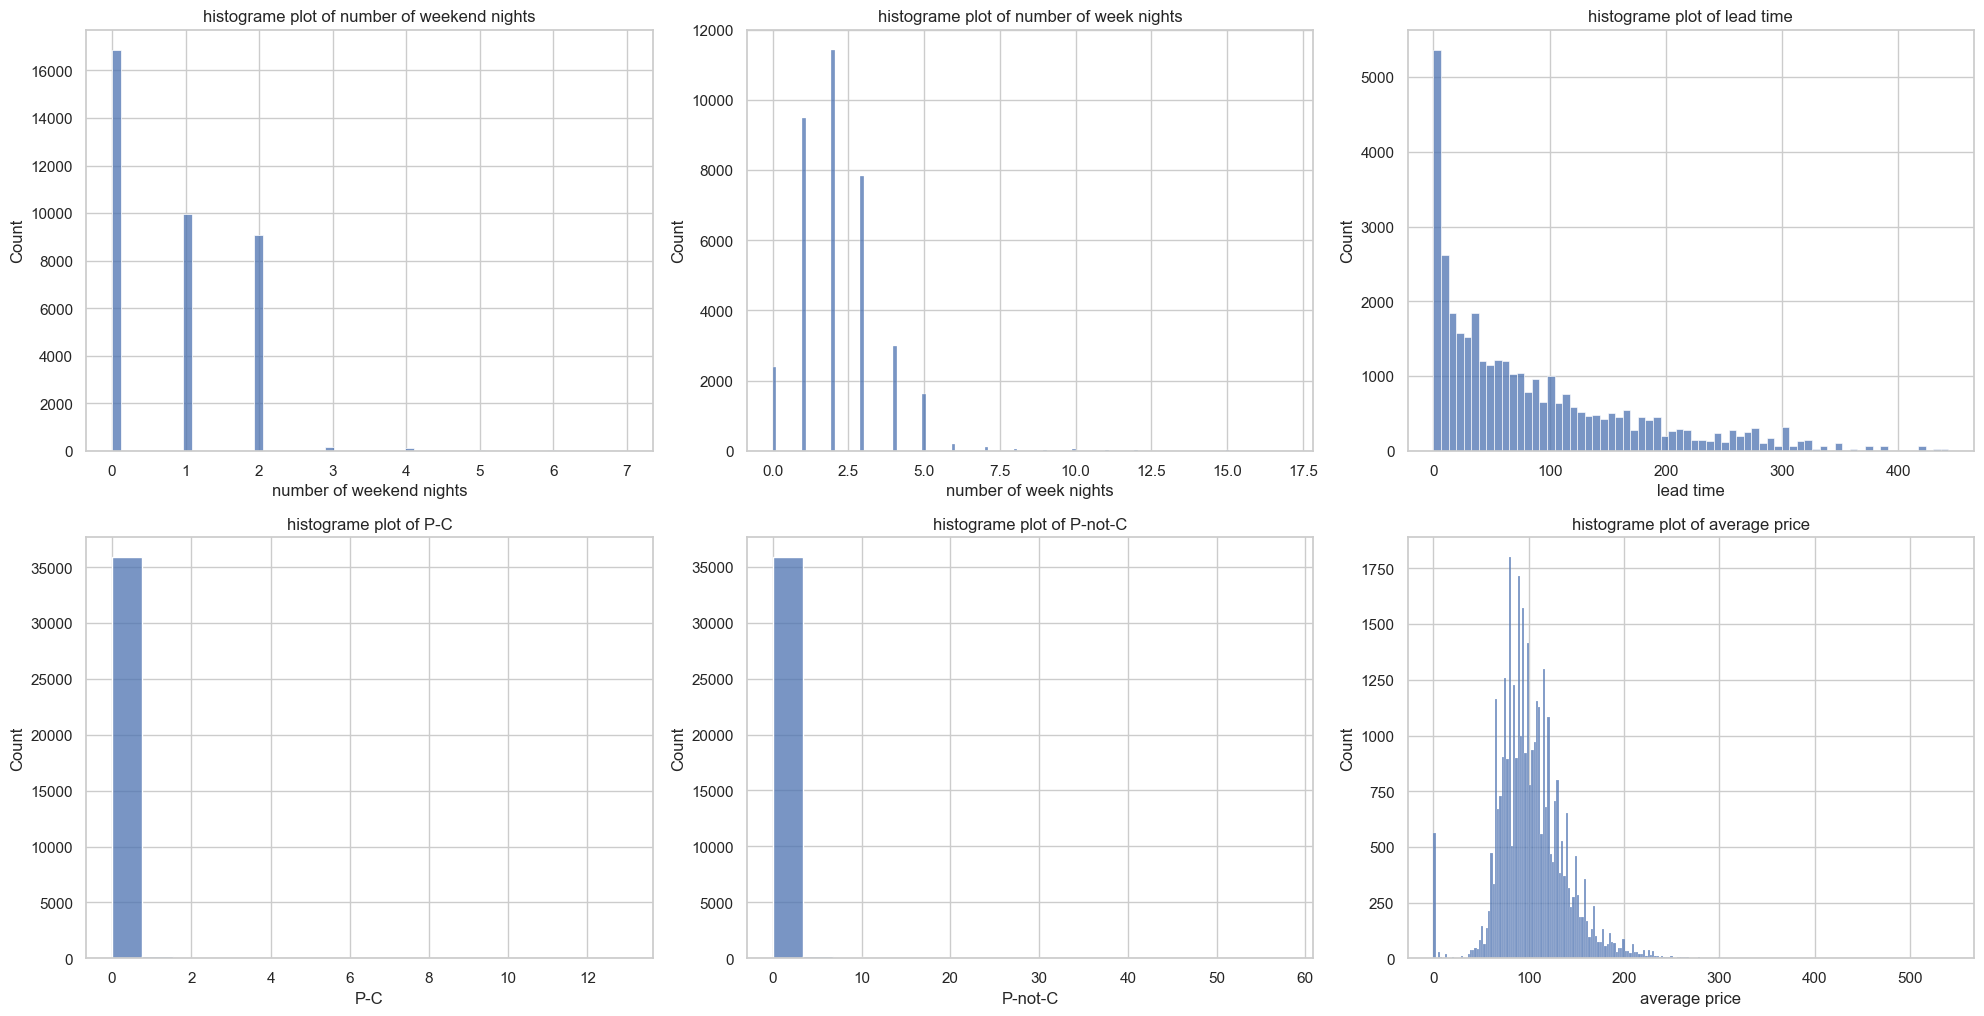

In [364]:
cleaner.continuous_plot(df, numerical_columns,7)

Column 'number of weekend nights' is not categorical.
Column 'number of week nights' is not categorical.
Column 'lead time' is not categorical.
Column 'P-C' is not categorical.
Column 'P-not-C' is not categorical.
Column 'average price' is not categorical.
Column 'reservation_month' is not categorical.
Column 'reservation_day' is not categorical.


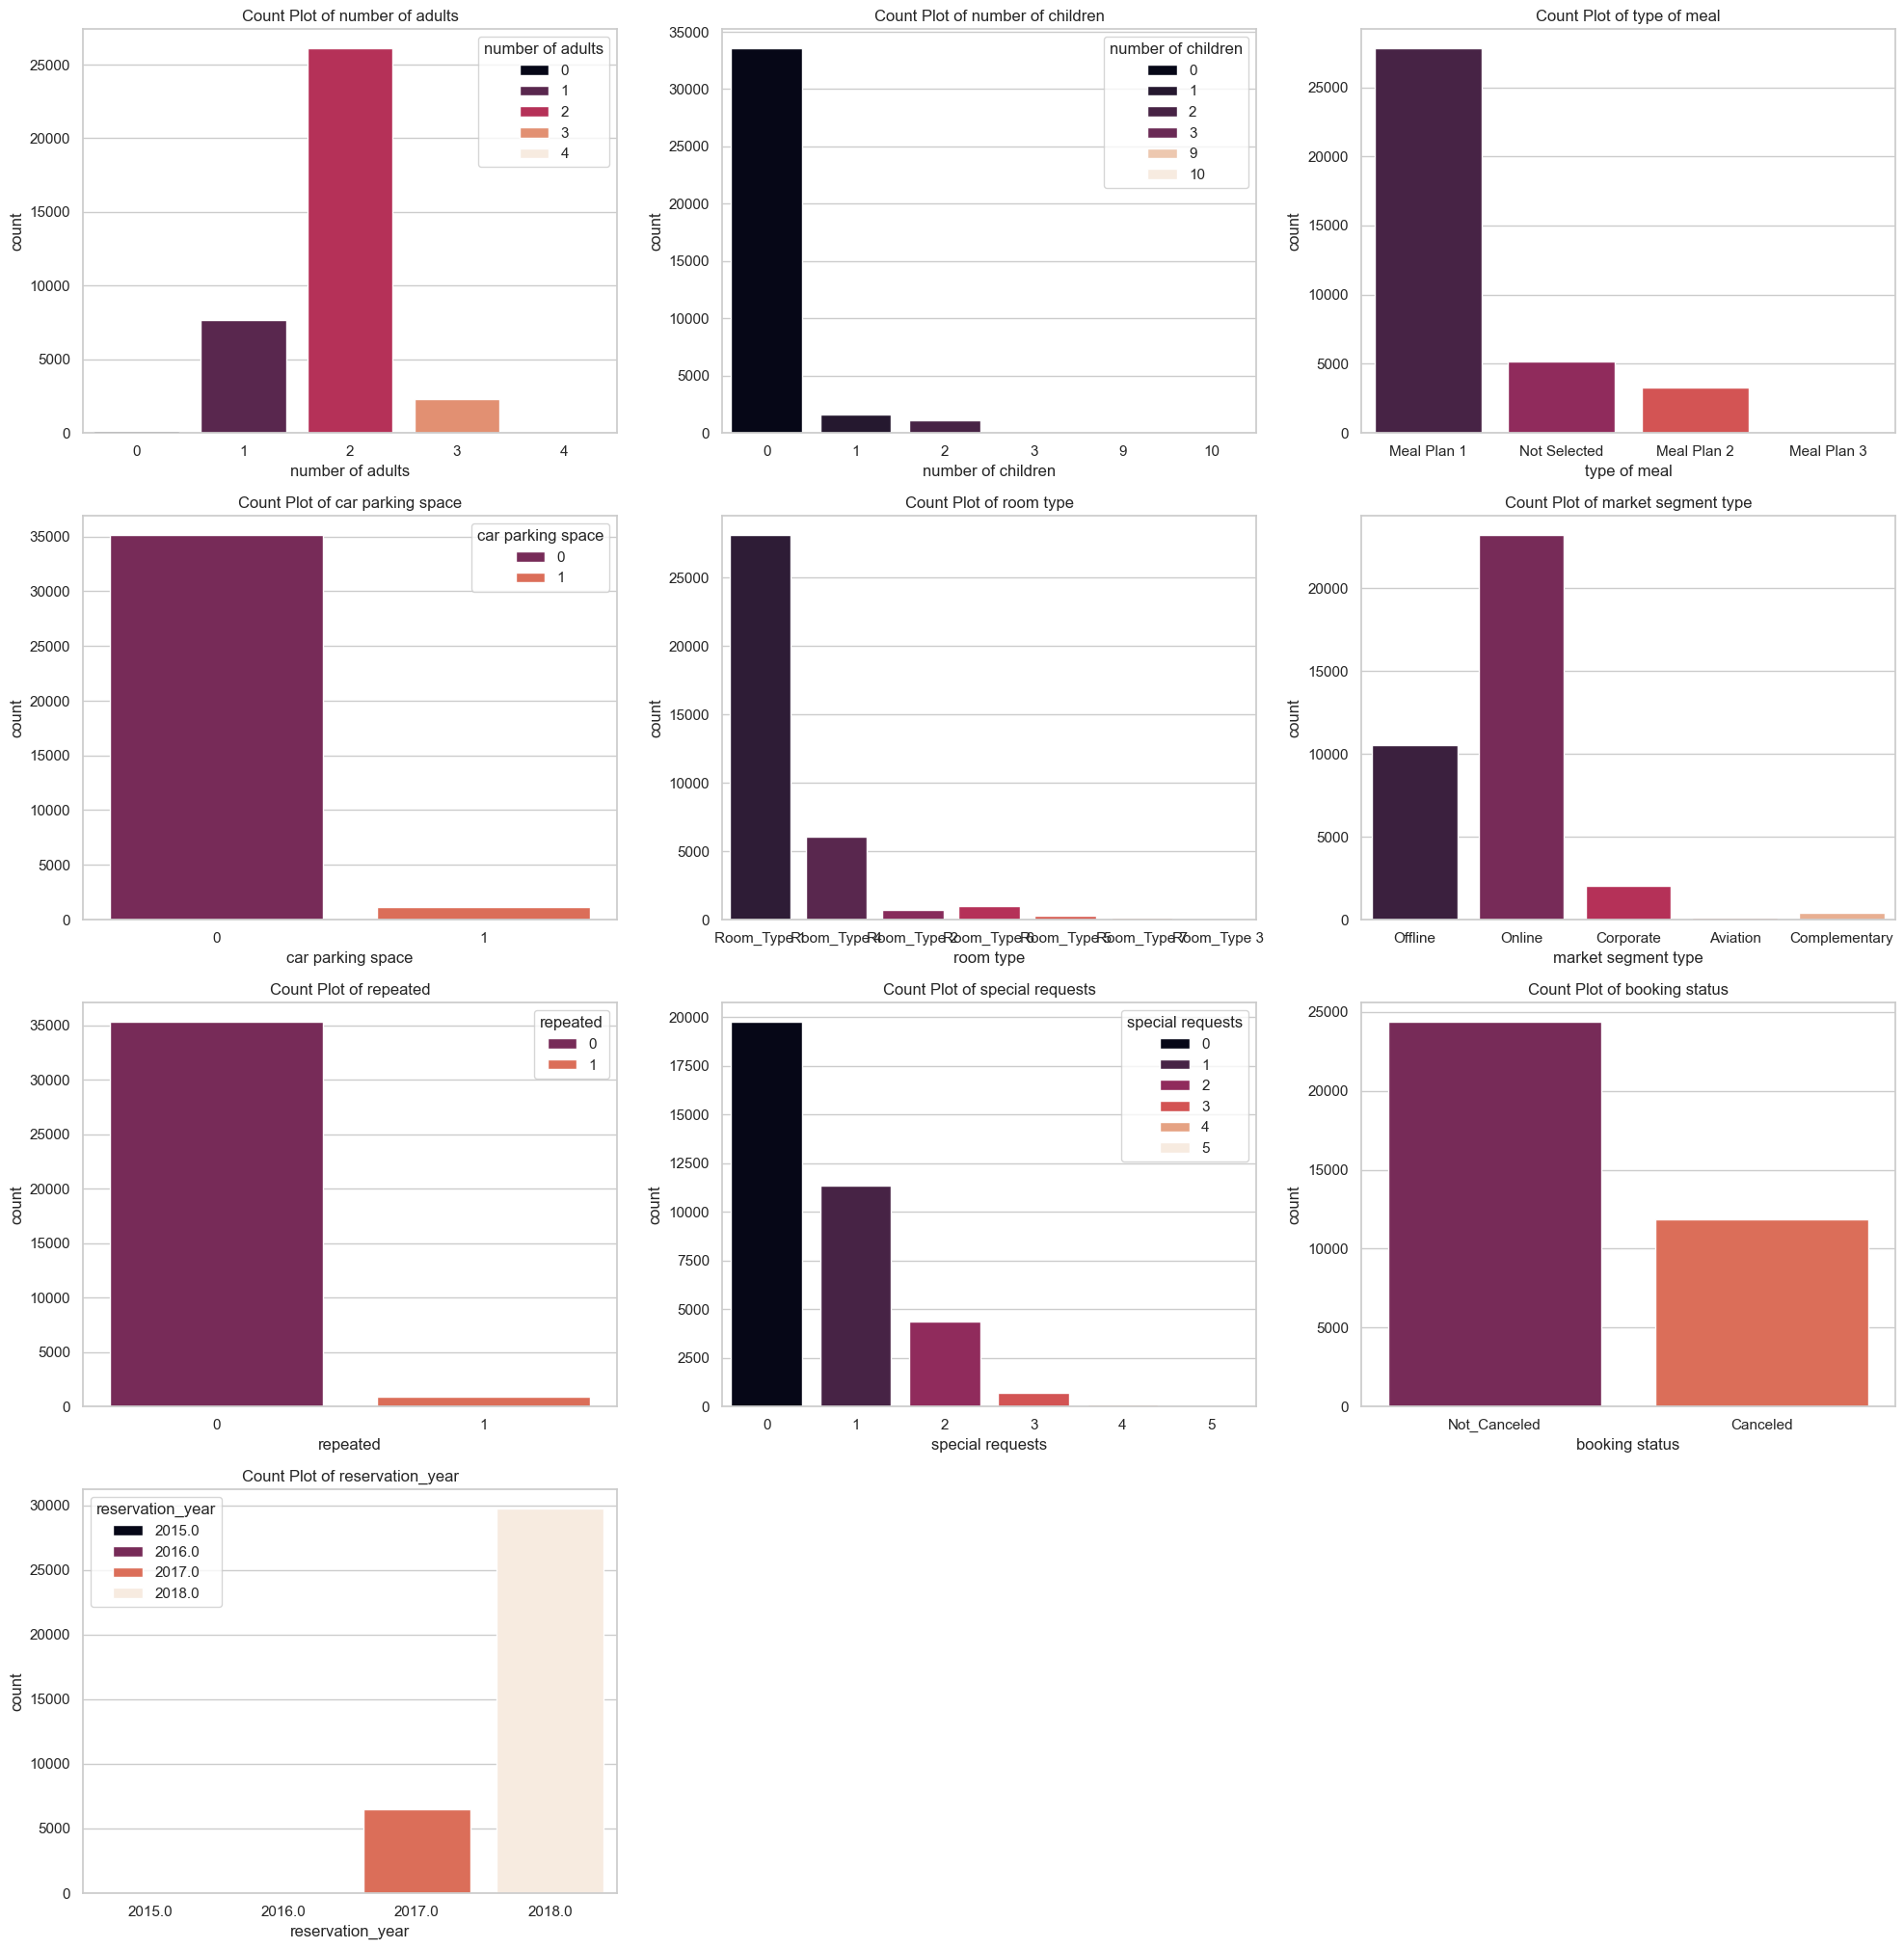

In [365]:
cleaner.categorical_plot(df, df.columns, 7)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11084\4261659414.py:12: UserWarning: 
The palette list has fewer values (11) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, orient="h", palette=palette)


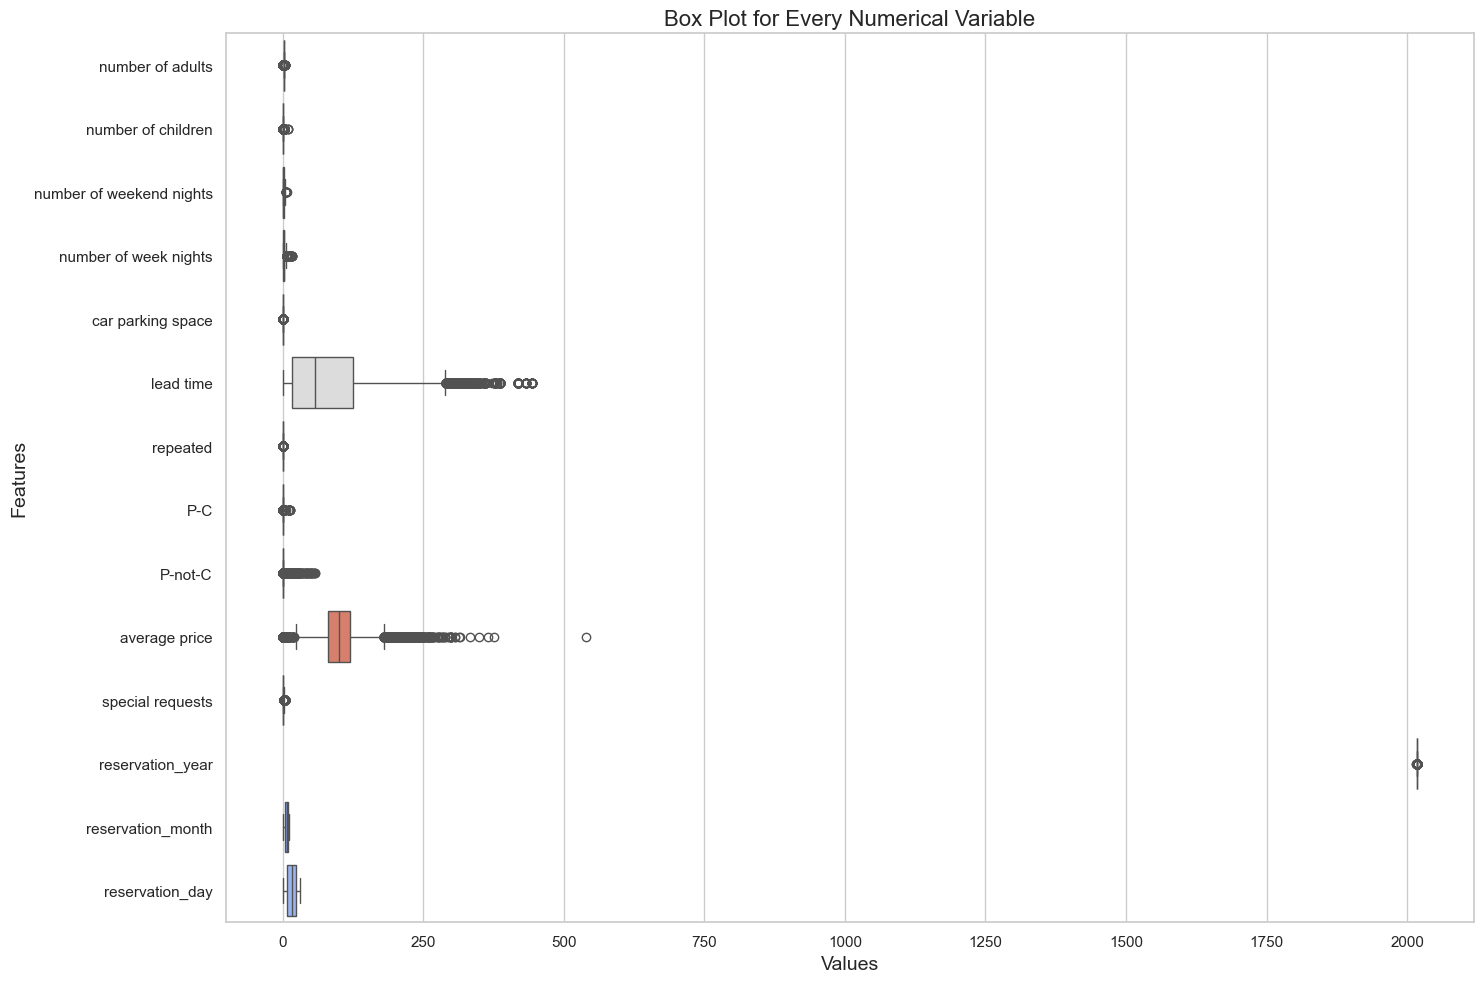

(36248, 18)

In [366]:
# Set up the aesthetics for the plot
sns.set(style="whitegrid")

# Create a color palette
palette = sns.color_palette("coolwarm", len(numerical_columns))

# Create the box plots for every numerical variable
plt.figure(figsize=(15, 10))


# Plotting
sns.boxplot(data=df, orient="h", palette=palette)
plt.title("Box Plot for Every Numerical Variable", fontsize=16)
plt.xlabel("Values", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

# Print the shape of the data
df.shape

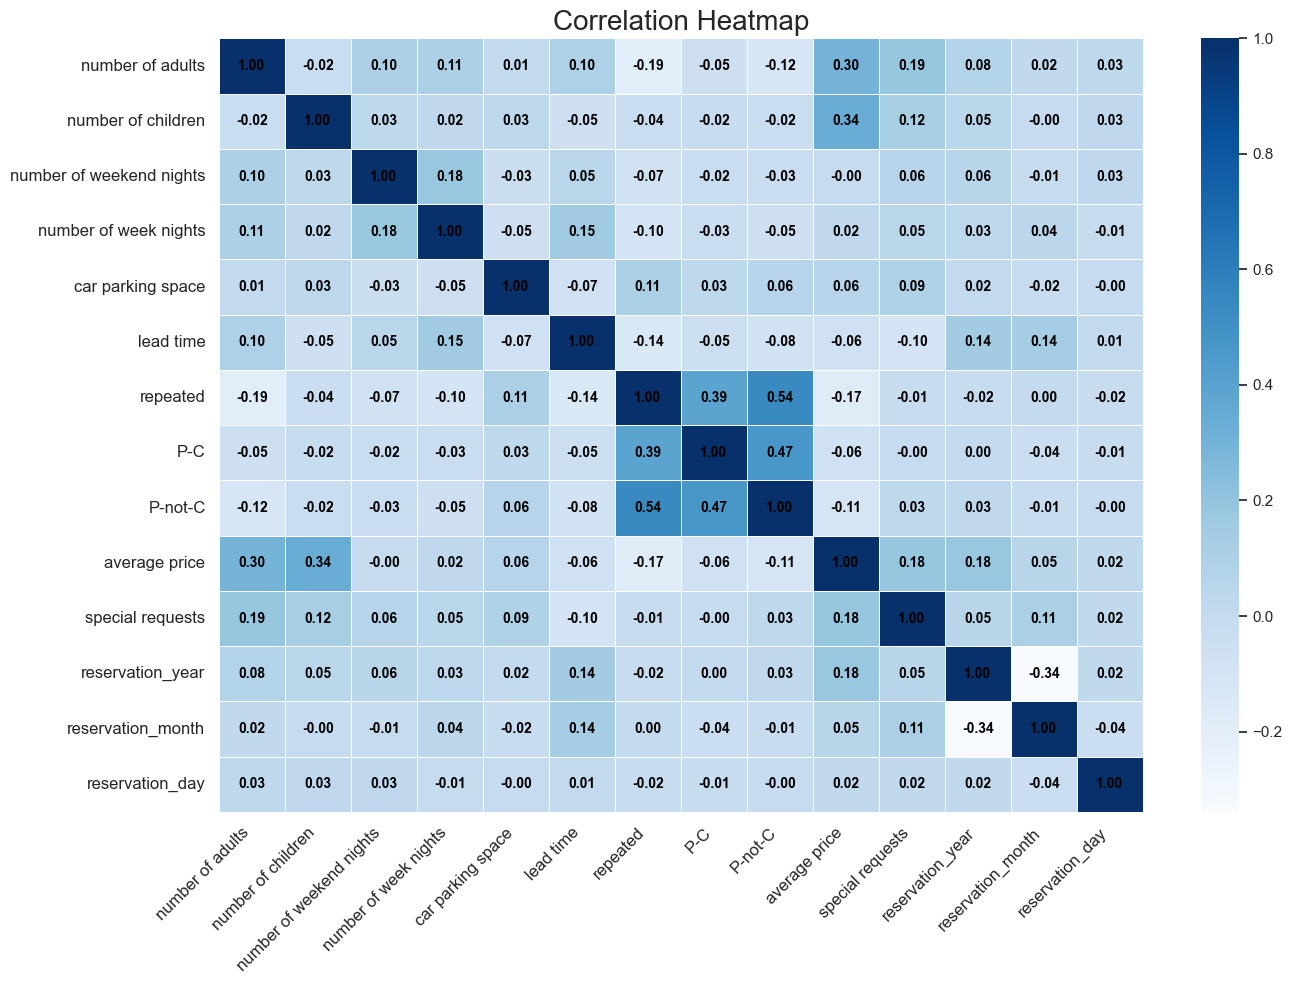

In [367]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix for numeric columns
corr = df[numeric_columns].corr()

# Create the heatmap with a simpler color scheme
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap="Blues", linewidths=0.5, fmt=".2f", annot_kws={"size": 10, "weight": "bold", "color": "black"})

# Add title and adjust layout
plt.title("Correlation Heatmap", fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


# **Found about 1/3 of dataset was outliers so decided to cap and floor instead of dropping them**

In [368]:
# Function to cap and floor outliers using IQR
def drop_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
# Cap and floor outliers in numerical columns
df_cleaned = drop_outliers_iqr(df, ['lead time','average price'])
# Display the shape of the dataframe before and after capping/flooring outliers
df.shape, df_cleaned.shape

((36248, 18), (33312, 18))

In [369]:
df['booking status'].value_counts()

booking status
Not_Canceled    24366
Canceled        11882
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11084\3850469418.py:12: UserWarning: 
The palette list has fewer values (11) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_cleaned, orient="h", palette=palette)


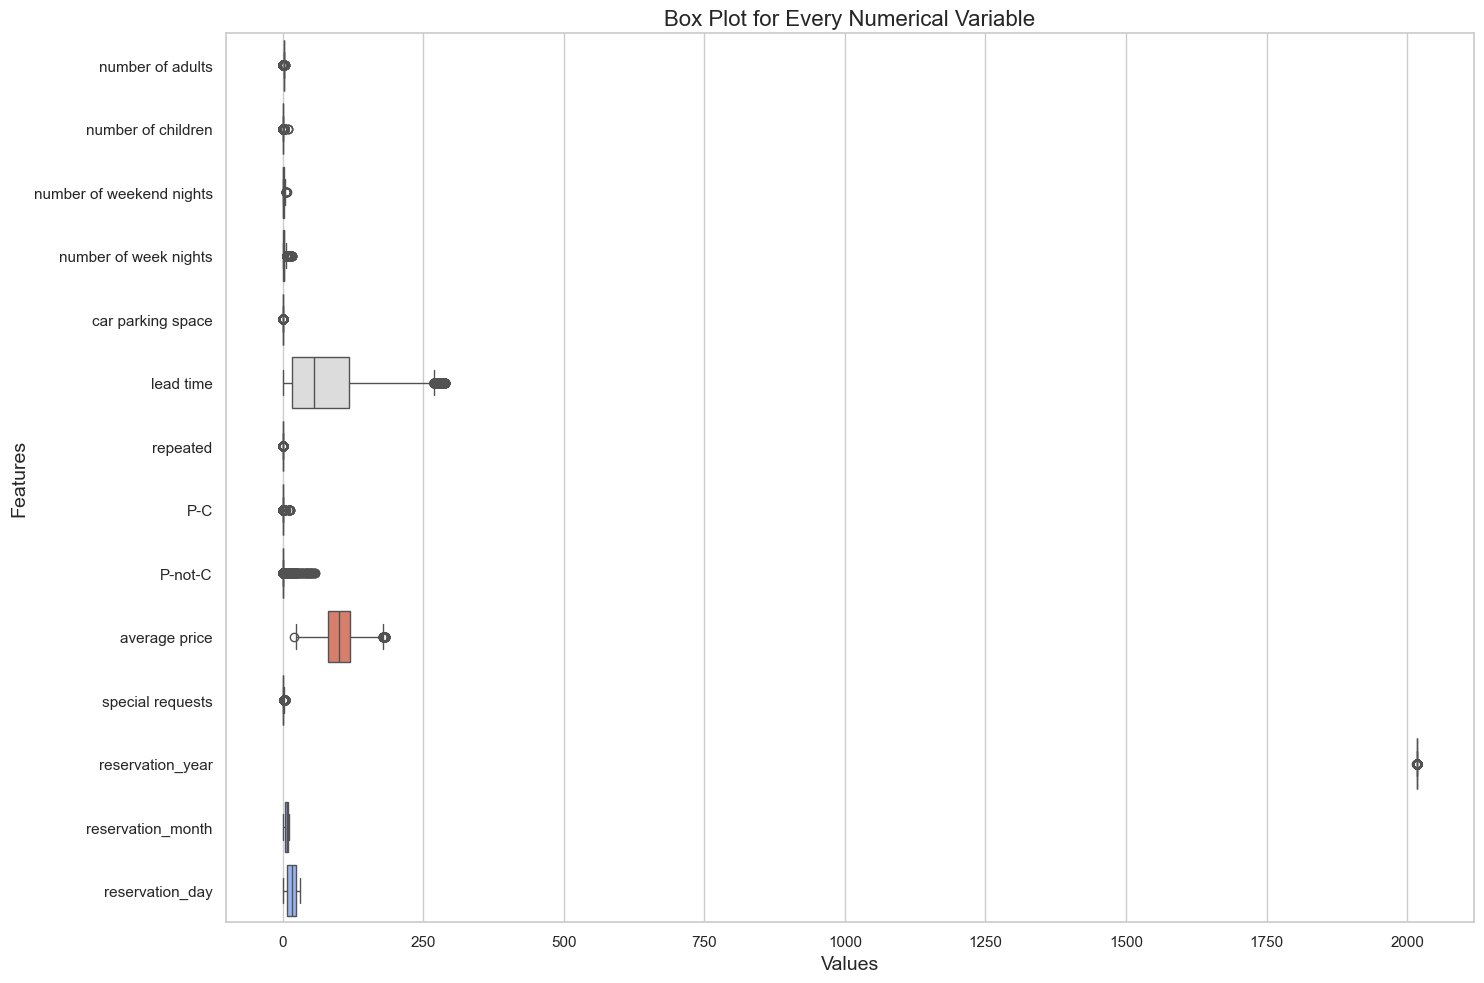

(36248, 18)

In [370]:
# Set up the aesthetics for the plot
sns.set(style="whitegrid")

# Create a color palette
palette = sns.color_palette("coolwarm", len(numerical_columns))

# Create the box plots for every numerical variable
plt.figure(figsize=(15, 10))


# Plotting
sns.boxplot(data=df_cleaned, orient="h", palette=palette)
plt.title("Box Plot for Every Numerical Variable", fontsize=16)
plt.xlabel("Values", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

# Print the shape of the data
df.shape

No highly correlated features

# **Encoding**

In [371]:
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=['type of meal', 'room type', 'market segment type'],drop_first=True,dtype=int)
# Map 'booking status' to numeric values: 'Not_Canceled' to 0 and 'Canceled' to 1
df_encoded['booking status'] = df_encoded['booking status'].map({'Not_Canceled': 0, 'Canceled': 1})
# Display the first few rows of the modified dataframe to confirm changes
df_encoded.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,0,224,0,0,0,88.00,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,3,0,5,0,0,0,106.68,...,0,0,0,0,0,0,0,0,0,1
2,2,1,1,3,0,1,0,0,0,50.00,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,2,0,211,0,0,0,100.00,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,2,0,48,0,0,0,77.00,...,0,0,0,0,0,0,0,0,0,1


In [372]:
df_encoded['booking status'].value_counts()

booking status
0    22895
1    10417
Name: count, dtype: int64

# **Split into train - test**

In [373]:
from sklearn.model_selection import train_test_split

In [374]:
X=df_encoded.drop(['booking status'],axis=1)
y=df_encoded['booking status']

In [375]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42,stratify=y_train_full)

In [376]:
X_train.shape

(19986, 26)

In [377]:
from sklearn.preprocessing import StandardScaler

In [378]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [379]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [429]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [430]:
X_train_res.shape

(26786, 26)

In [382]:
from sklearn.feature_selection import SelectFromModel

# **Modelling using different models**

In [383]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier

In [384]:
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=17),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=150),
    "XGBoost": XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=150),
    "Extra Trees": ExtraTreesClassifier(n_estimators=150),
    "LightGBM": LGBMClassifier(random_state=42,force_col_wise=True)

}

In [262]:
best_models = {}
best_scores = {}

for clf_name, clf in classifiers.items():
    print(f"Classifier: {clf_name}")

    # Fit the classifier on the training set
    clf.fit(X_train_scaled, y_train)

    # Evaluate the classifier on the validation set
    y_val_pred = clf.predict(X_val_scaled)
    val_score = accuracy_score(y_val, y_val_pred)
    best_models[clf_name] = clf
    best_scores[clf_name] = val_score

    print(f"Validation accuracy for {clf_name}: {val_score}")
    print("\n" + "-"*60 + "\n")

# Select the best model based on validation accuracy
best_clf_name = max(best_scores, key=best_scores.get)
best_clf = best_models[best_clf_name]

print(f"Selected best classifier: {best_clf_name} with validation accuracy: {best_scores[best_clf_name]}")

# Retrain the best model on the combined training and validation set
best_clf.fit(np.vstack((X_train_scaled, X_val_scaled)), np.concatenate((y_train, y_val)))

# Predict on the test set using the best model
y_pred_best = best_clf.predict(X_test_scaled)

Classifier: KNN
Validation accuracy for KNN: 0.8356596127870328

------------------------------------------------------------

Classifier: Logistic Regression
Validation accuracy for Logistic Regression: 0.8017409575266397

------------------------------------------------------------

Classifier: Decision Tree
Validation accuracy for Decision Tree: 0.8608734804142278

------------------------------------------------------------

Classifier: Random Forest
Validation accuracy for Random Forest: 0.895092300765421

------------------------------------------------------------

Classifier: XGBoost
Validation accuracy for XGBoost: 0.8845865225874231

------------------------------------------------------------

Classifier: Gradient Boosting
Validation accuracy for Gradient Boosting: 0.8559207564160288

------------------------------------------------------------

Classifier: Extra Trees
Validation accuracy for Extra Trees: 0.8881885036770224

--------------------------------------------------

In [263]:
# Print classification report and confusion matrix for the best model
print(f"Best Classifier: {best_clf_name}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Best Classifier: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4579
           1       0.87      0.80      0.83      2084

    accuracy                           0.90      6663
   macro avg       0.89      0.87      0.88      6663
weighted avg       0.90      0.90      0.90      6663



In [264]:
best_models = {}
best_scores = {}

for clf_name, clf in classifiers.items():
    print(f"Classifier: {clf_name}")

    # Fit the classifier on the training set
    clf.fit(X_train_res, y_train_res)

    # Evaluate the classifier on the validation set
    y_val_pred = clf.predict(X_val_scaled)
    val_score = accuracy_score(y_val, y_val_pred)
    best_models[clf_name] = clf
    best_scores[clf_name] = val_score

    print(f"Validation accuracy for {clf_name}: {val_score}")
    print("\n" + "-"*60 + "\n")

# Select the best model based on validation accuracy
best_clf_name = max(best_scores, key=best_scores.get)
best_clf = best_models[best_clf_name]

print(f"Selected best classifier: {best_clf_name} with validation accuracy: {best_scores[best_clf_name]}")

# Retrain the best model on the combined training and validation set
best_clf.fit(np.vstack((X_train_res, X_val_scaled)), np.concatenate((y_train_res, y_val)))

# Predict on the test set using the best model
y_pred_best = best_clf.predict(X_test_scaled)

Classifier: KNN
Validation accuracy for KNN: 0.8123968182500375

------------------------------------------------------------

Classifier: Logistic Regression
Validation accuracy for Logistic Regression: 0.7733753564460453

------------------------------------------------------------

Classifier: Decision Tree
Validation accuracy for Decision Tree: 0.8569713342338287

------------------------------------------------------------

Classifier: Random Forest
Validation accuracy for Random Forest: 0.8941918054930211

------------------------------------------------------------

Classifier: XGBoost
Validation accuracy for XGBoost: 0.8838361098604233

------------------------------------------------------------

Classifier: Gradient Boosting
Validation accuracy for Gradient Boosting: 0.8428635749662314

------------------------------------------------------------

Classifier: Extra Trees
Validation accuracy for Extra Trees: 0.8872880084046225

-------------------------------------------------

In [265]:
# Print classification report and confusion matrix for the best model
print(f"Best Classifier: {best_clf_name}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Best Classifier: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      4579
           1       0.84      0.82      0.83      2084

    accuracy                           0.90      6663
   macro avg       0.88      0.88      0.88      6663
weighted avg       0.90      0.90      0.90      6663



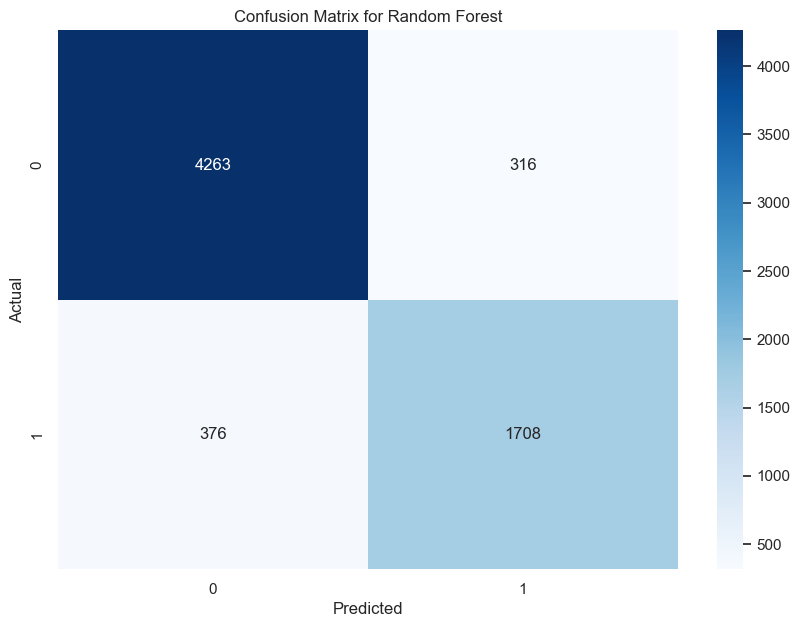


------------------------------------------------------------



In [268]:
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for {best_clf_name}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n" + "-"*60 + "\n")

In [267]:
# Print accuracy for each classifier
accuracy_results = {clf_name: accuracy_score(y_test, clf.predict(X_test_scaled)) for clf_name, clf in best_models.items()}
accuracy_results

{'KNN': 0.8008404622542399,
 'Logistic Regression': 0.7625694131772475,
 'Decision Tree': 0.8511181149632298,
 'Random Forest': 0.8961428785832207,
 'XGBoost': 0.8805342938616239,
 'Gradient Boosting': 0.8377607684226325,
 'Extra Trees': 0.8875881734954225,
 'LightGBM': 0.8778328080444244}

In [195]:
from sklearn.model_selection import RandomizedSearchCV

In [196]:
param_grids = {
    "KNN": {
        'n_neighbors': np.arange(1, 21, 2),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Logistic Regression": {
        'C': np.logspace(-4, 4, 20),
        'solver': ['lbfgs', 'liblinear']
    },
    "Decision Tree": {
        'max_depth': np.arange(1, 31, 1),
        'min_samples_split': np.arange(2, 11, 1),
        'min_samples_leaf': np.arange(1, 11, 1)
    },
    "Random Forest": {
        'n_estimators': np.arange(100, 501, 10),
        'max_depth': np.arange(10, 51, 5),
        'min_samples_split': np.arange(2, 11, 1),
        'min_samples_leaf': np.arange(1, 11, 1)
    },
    "XGBoost": {
        'n_estimators': np.arange(100, 501, 10),
        'learning_rate': np.linspace(0.01, 0.3, 30),
        'max_depth': np.arange(3, 10, 1)
    },
    "Gradient Boosting": {
        'n_estimators': np.arange(100, 501, 10),
        'learning_rate': np.linspace(0.01, 0.3, 30),
        'max_depth': np.arange(3, 10, 1)
    },
    "Extra Trees": {
        'n_estimators': np.arange(100, 501, 10),
        'max_depth': np.arange(10, 51, 5),
        'min_samples_split': np.arange(2, 11, 2),
        'min_samples_leaf': np.arange(1, 11, 2)
    }
    ,
    "LightGBM": {
        'num_leaves': np.arange(20, 151, 10),
        'learning_rate': np.linspace(0.01, 0.3, 30),
        'n_estimators': np.arange(50, 551, 25),
        'min_child_samples': np.arange(20, 501, 25)
    }
}


In [197]:
best_models = {}
best_scores = {}
for clf_name, clf in classifiers.items():
    print(f"Tuning hyperparameters for: {clf_name}")

    param_grid = param_grids[clf_name]
    random_search = RandomizedSearchCV(clf, param_grid, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train_scaled, y_train)

    best_models[clf_name] = random_search.best_estimator_

    # Evaluate on validation set
    val_score = random_search.score(X_val_scaled, y_val)
    best_scores[clf_name] = val_score

    print(f"Best parameters for {clf_name}: {random_search.best_params_}")
    print(f"Validation accuracy for {clf_name}: {val_score}")
    print("\n" + "-"*60 + "\n")

# Select the best model based on validation accuracy
best_clf_name = max(best_scores, key=best_scores.get)
best_clf = best_models[best_clf_name]

print(f"Selected best classifier: {best_clf_name} with validation accuracy: {best_scores[best_clf_name]}")

# Retrain the best model on the combined training and validation set
best_clf.fit(np.vstack((X_train_scaled, X_val_scaled)), np.concatenate((y_train, y_val)))

Tuning hyperparameters for: KNN
Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 19, 'metric': 'manhattan'}
Validation accuracy for KNN: 0.8710790935014258

------------------------------------------------------------

Tuning hyperparameters for: Logistic Regression
Best parameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.03359818286283781}
Validation accuracy for Logistic Regression: 0.8012907098904397

------------------------------------------------------------

Tuning hyperparameters for: Decision Tree
Best parameters for Decision Tree: {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 10}
Validation accuracy for Decision Tree: 0.8707789284106259

------------------------------------------------------------

Tuning hyperparameters for: Random Forest
Best parameters for Random Forest: {'n_estimators': 190, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 25}
Validation accuracy for Random Forest: 0.8959927960378208

---------------

C:\Users\Lenovo\anaconda3\envs\myenv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for XGBoost: {'n_estimators': 140, 'max_depth': 9, 'learning_rate': 0.15999999999999998}
Validation accuracy for XGBoost: 0.8904397418580219

------------------------------------------------------------

Tuning hyperparameters for: Gradient Boosting
Best parameters for Gradient Boosting: {'n_estimators': 230, 'max_depth': 7, 'learning_rate': 0.06999999999999999}
Validation accuracy for Gradient Boosting: 0.8919405673120216

------------------------------------------------------------

Tuning hyperparameters for: Extra Trees
Best parameters for Extra Trees: {'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 50}
Validation accuracy for Extra Trees: 0.8913402371304218

------------------------------------------------------------

Tuning hyperparameters for: LightGBM
[LightGBM] [Info] Number of positive: 6250, number of negative: 13736
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 19986, number of u

RandomForestClassifier(max_depth=25, min_samples_split=7, n_estimators=190)

In [198]:
# Predict on the test set using the best model
y_pred_best = best_clf.predict(X_test_scaled)
# Print classification report and confusion matrix for the best model
print(f"Classification Report for {best_clf_name} on test set:")
print(classification_report(y_test, y_pred_best))


Classification Report for Random Forest on test set:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4579
           1       0.86      0.79      0.82      2084

    accuracy                           0.89      6663
   macro avg       0.88      0.87      0.87      6663
weighted avg       0.89      0.89      0.89      6663



Highest accuracy was for XGBoost

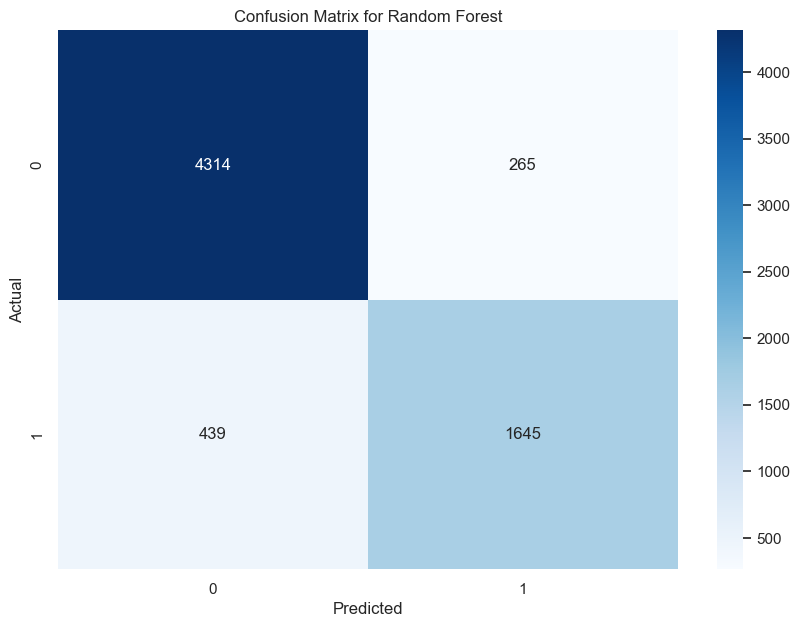

In [199]:
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for {best_clf_name}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [200]:
best_models = {}
best_scores = {}
for clf_name, clf in classifiers.items():
    print(f"Tuning hyperparameters for: {clf_name}")

    param_grid = param_grids[clf_name]
    random_search = RandomizedSearchCV(clf, param_grid, n_iter=30, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train_res, y_train_res)

    best_models[clf_name] = random_search.best_estimator_

    # Evaluate on validation set
    val_score = random_search.score(X_val_scaled, y_val)
    best_scores[clf_name] = val_score

    print(f"Best parameters for {clf_name}: {random_search.best_params_}")
    print(f"Validation accuracy for {clf_name}: {val_score}")
    print("\n" + "-"*60 + "\n")

# Select the best model based on validation accuracy
best_clf_name = max(best_scores, key=best_scores.get)
best_clf = best_models[best_clf_name]

print(f"Selected best classifier: {best_clf_name} with validation accuracy: {best_scores[best_clf_name]}")

# Retrain the best model on the combined training and validation set
best_clf.fit(np.vstack((X_train_res, X_val_scaled)), np.concatenate((y_train_res, y_val)))

Tuning hyperparameters for: KNN
Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'manhattan'}
Validation accuracy for KNN: 0.8440642353294312

------------------------------------------------------------

Tuning hyperparameters for: Logistic Regression
Best parameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.0006951927961775605}
Validation accuracy for Logistic Regression: 0.7769773375356446

------------------------------------------------------------

Tuning hyperparameters for: Decision Tree
Best parameters for Decision Tree: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 15}
Validation accuracy for Decision Tree: 0.8664265345940267

------------------------------------------------------------

Tuning hyperparameters for: Random Forest
Best parameters for Random Forest: {'n_estimators': 190, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 25}
Validation accuracy for Random Forest: 0.8914903196758217

--------------

GradientBoostingClassifier(learning_rate=0.08999999999999998, max_depth=9,
                           n_estimators=260)

In [201]:
# Predict on the test set using the best model
y_pred_best = best_clf.predict(X_test_scaled)
# Print classification report and confusion matrix for the best model
print(f"Classification Report for {best_clf_name} on test set:")
print(classification_report(y_test, y_pred_best))


Classification Report for Gradient Boosting on test set:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      4579
           1       0.84      0.81      0.82      2084

    accuracy                           0.89      6663
   macro avg       0.88      0.87      0.87      6663
weighted avg       0.89      0.89      0.89      6663



In [385]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE

In [ ]:
# 1. Variance Threshold
def variance_threshold_selector(data, threshold=0.1):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[:, selector.get_support(indices=True)], selector

# Applying Variance Threshold
X_train_vt, vt_selector = variance_threshold_selector(X_train_res)
X_val_vt = X_val_scaled[:, vt_selector.get_support(indices=True)]
X_test_vt = X_test_scaled[:, vt_selector.get_support(indices=True)]

In [204]:
def recursive_feature_elimination(data, target, num_features):
    model = LogisticRegression(max_iter=1000)
    rfe = RFE(estimator=model, n_features_to_select=num_features)
    fit = rfe.fit(data, target)
    return data[:, fit.support_], rfe

# Applying RFE
num_features = 18  # Set the number of features you want to select
X_train_rfe, rfe_selector = recursive_feature_elimination(X_train_scaled, y_train, num_features)
X_val_rfe = X_val_scaled[:, rfe_selector.get_support(indices=True)]
X_test_rfe = X_test_scaled[:, rfe_selector.get_support(indices=True)]

In [205]:
def lasso_selector(data, target, alpha=0.01):
    lasso = LogisticRegression(penalty='l1', solver='liblinear', C=alpha, max_iter=1000)
    lasso.fit(data, target)
    model = SelectFromModel(lasso, prefit=True)
    return data[:, model.get_support(indices=True)], model

# Applying Lasso
X_train_lasso, lasso_selector = lasso_selector(X_train_scaled, y_train)
X_val_lasso = X_val_scaled[:, lasso_selector.get_support(indices=True)]
X_test_lasso = X_test_scaled[:, lasso_selector.get_support(indices=True)]

In [206]:
from sklearn.decomposition import PCA
def pca_selector(data, n_components):
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)
    return data_pca, pca
n_components = 10
X_train_pca, pca = pca_selector(X_train_scaled, n_components)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [207]:
feature_selection_methods = ['Variance Threshold', 'RFE', 'Lasso', 'PCA']



Feature Selection Method: Variance Threshold

Tuning hyperparameters for: KNN


C:\Users\Lenovo\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 19, 'metric': 'manhattan'}
Validation accuracy for KNN: 0.8710790935014258

------------------------------------------------------------

Tuning hyperparameters for: Logistic Regression


C:\Users\Lenovo\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.23357214690901212}
Validation accuracy for Logistic Regression: 0.8021912051628396

------------------------------------------------------------

Tuning hyperparameters for: Decision Tree
Best parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Validation accuracy for Decision Tree: 0.869728350592826

------------------------------------------------------------

Tuning hyperparameters for: Random Forest
Best parameters for Random Forest: {'n_estimators': 190, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 25}
Validation accuracy for Random Forest: 0.8943418880384212

------------------------------------------------------------

Tuning hyperparameters for: XGBoost
Best parameters for XGBoost: {'n_estimators': 260, 'max_depth': 9, 'learning_rate': 0.08999999999999998}
Validation accuracy for XGBoost: 0.8907399069488219

-----------------------------------------

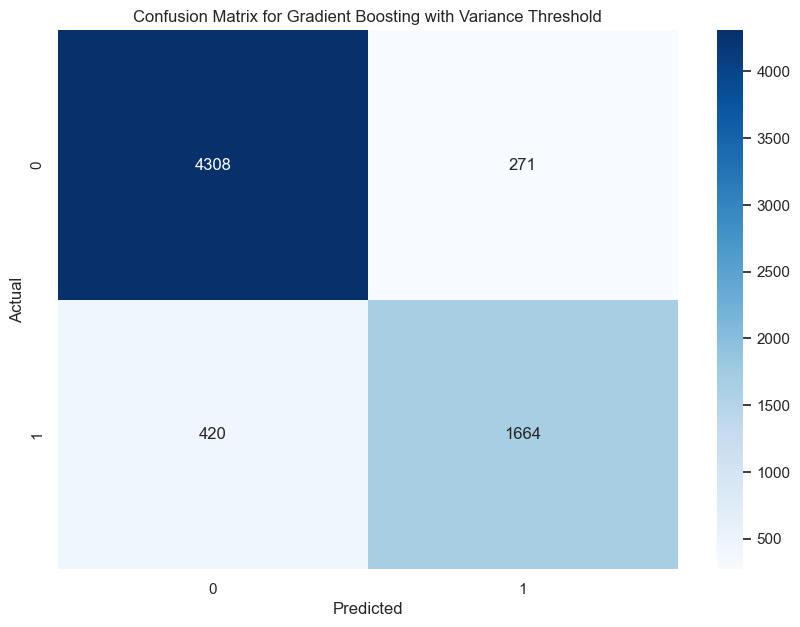



Feature Selection Method: RFE

Tuning hyperparameters for: KNN


C:\Users\Lenovo\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 17, 'metric': 'manhattan'}
Validation accuracy for KNN: 0.8731802491370254

------------------------------------------------------------

Tuning hyperparameters for: Logistic Regression


C:\Users\Lenovo\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.23357214690901212}
Validation accuracy for Logistic Regression: 0.8008404622542399

------------------------------------------------------------

Tuning hyperparameters for: Decision Tree
Best parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 13}
Validation accuracy for Decision Tree: 0.8724298364100255

------------------------------------------------------------

Tuning hyperparameters for: Random Forest
Best parameters for Random Forest: {'n_estimators': 190, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 25}
Validation accuracy for Random Forest: 0.8911901545850217

------------------------------------------------------------

Tuning hyperparameters for: XGBoost
Best parameters for XGBoost: {'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.03}
Validation accuracy for XGBoost: 0.889839411676422

--------------------------------------------------------

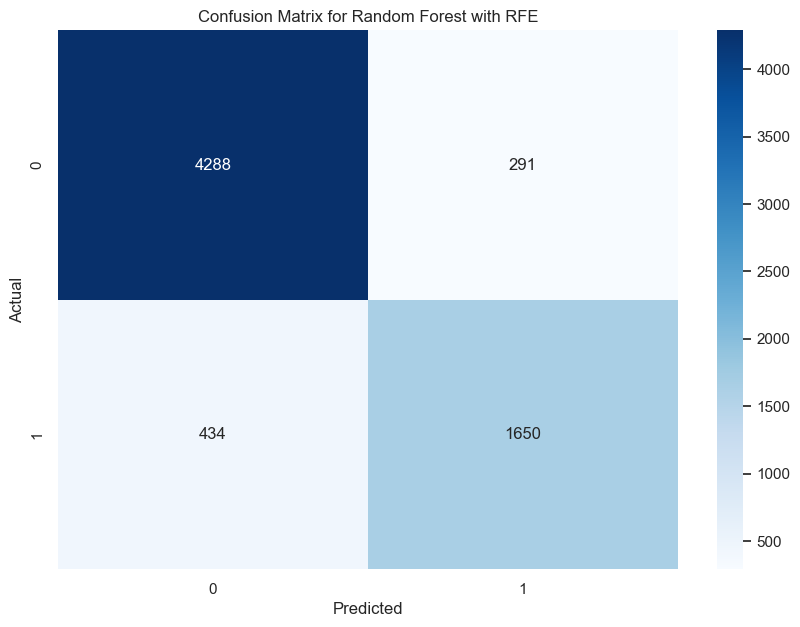



Feature Selection Method: Lasso

Tuning hyperparameters for: KNN


C:\Users\Lenovo\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 17, 'metric': 'manhattan'}
Validation accuracy for KNN: 0.8736304967732252

------------------------------------------------------------

Tuning hyperparameters for: Logistic Regression


C:\Users\Lenovo\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.23357214690901212}
Validation accuracy for Logistic Regression: 0.804892690980039

------------------------------------------------------------

Tuning hyperparameters for: Decision Tree
Best parameters for Decision Tree: {'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 12}
Validation accuracy for Decision Tree: 0.8730301665916254

------------------------------------------------------------

Tuning hyperparameters for: Random Forest
Best parameters for Random Forest: {'n_estimators': 190, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 25}
Validation accuracy for Random Forest: 0.8929911451298214

------------------------------------------------------------

Tuning hyperparameters for: XGBoost
Best parameters for XGBoost: {'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.03}
Validation accuracy for XGBoost: 0.8881885036770224

---------------------------------------------------------

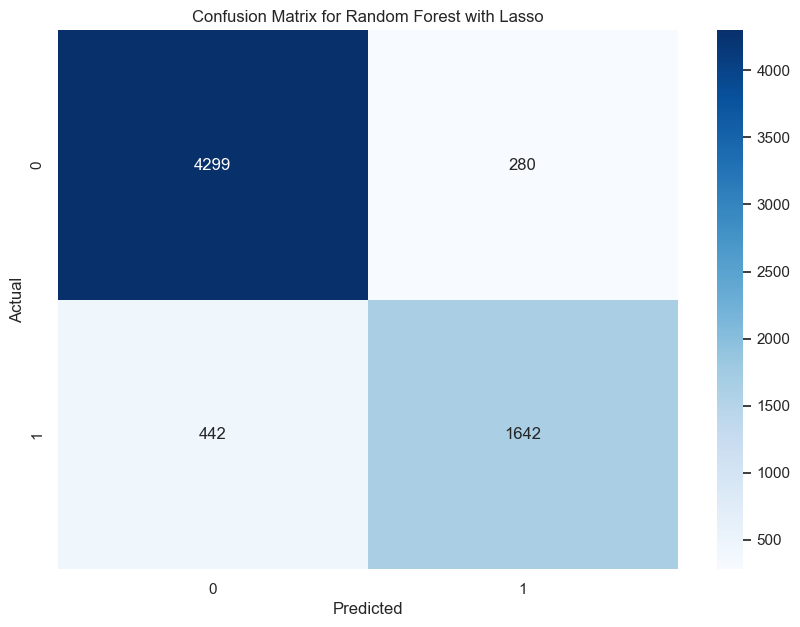



Feature Selection Method: PCA

Tuning hyperparameters for: KNN


C:\Users\Lenovo\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'manhattan'}
Validation accuracy for KNN: 0.8617739756866276

------------------------------------------------------------

Tuning hyperparameters for: Logistic Regression


C:\Users\Lenovo\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression: {'solver': 'lbfgs', 'C': 0.03359818286283781}
Validation accuracy for Logistic Regression: 0.735404472459853

------------------------------------------------------------

Tuning hyperparameters for: Decision Tree
Best parameters for Decision Tree: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 15}
Validation accuracy for Decision Tree: 0.820201110610836

------------------------------------------------------------

Tuning hyperparameters for: Random Forest
Best parameters for Random Forest: {'n_estimators': 190, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 25}
Validation accuracy for Random Forest: 0.8676271949572265

------------------------------------------------------------

Tuning hyperparameters for: XGBoost
Best parameters for XGBoost: {'n_estimators': 260, 'max_depth': 9, 'learning_rate': 0.08999999999999998}
Validation accuracy for XGBoost: 0.8662764520486268

-----------------------------------------------

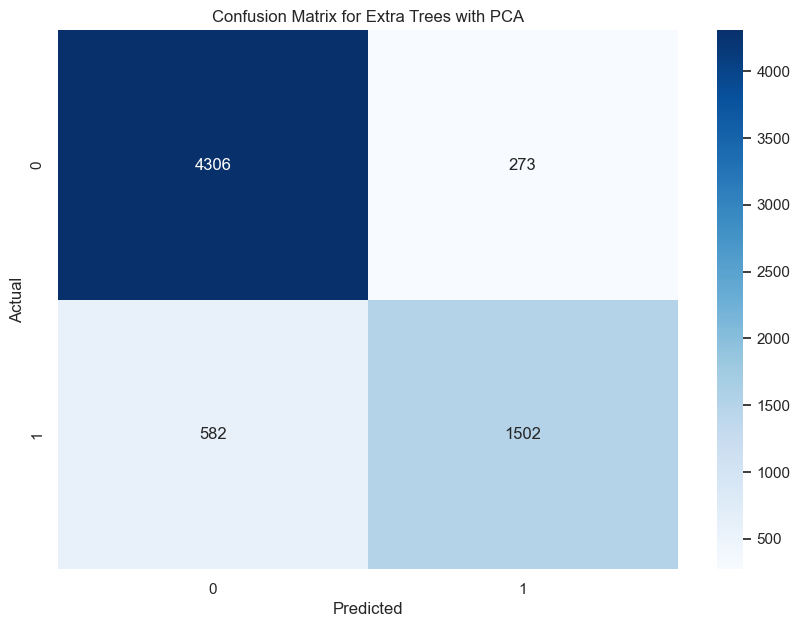

In [208]:
best_models = {}
best_scores = {}
for method, (X_tr, X_vl, X_te) in zip(feature_selection_methods,
                                      [(X_train_vt, X_val_vt, X_test_vt),
                                       (X_train_rfe, X_val_rfe, X_test_rfe),
                                       (X_train_lasso, X_val_lasso, X_test_lasso),
                                       (X_train_pca, X_val_pca, X_test_pca)]):
    print(f"\n\nFeature Selection Method: {method}\n" + "="*60 + "\n")
    for clf_name, clf in classifiers.items():
        print(f"Tuning hyperparameters for: {clf_name}")

        param_grid = param_grids[clf_name]
        random_search = RandomizedSearchCV(clf, param_grid, n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
        random_search.fit(X_tr, y_train)

        best_models[clf_name] = random_search.best_estimator_

        # Evaluate on validation set
        val_score = random_search.score(X_vl, y_val)
        best_scores[clf_name] = val_score

        print(f"Best parameters for {clf_name}: {random_search.best_params_}")
        print(f"Validation accuracy for {clf_name}: {val_score}")
        print("\n" + "-"*60 + "\n")

    # Select the best model based on validation accuracy
    best_clf_name = max(best_scores, key=best_scores.get)
    best_clf = best_models[best_clf_name]

    print(f"Selected best classifier: {best_clf_name} with validation accuracy: {best_scores[best_clf_name]}")

    # Retrain the best model on the combined training and validation set
    best_clf.fit(np.vstack((X_tr, X_vl)), np.concatenate((y_train, y_val)))
     # Predict on the test set using the best model
    y_pred_best = best_clf.predict(X_te)

    # Print classification report and confusion matrix for the best model
    print(f"Best Classifier: {best_clf_name} with {method}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_best))
    cm_best = confusion_matrix(y_test, y_pred_best)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {best_clf_name} with {method}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [271]:
X_train_vt.shape

(26752, 26)



Feature Selection Method: Variance Threshold

Tuning hyperparameters for: KNN
Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'euclidean'}
Validation accuracy for KNN: 0.8383610986042324

------------------------------------------------------------

Tuning hyperparameters for: Logistic Regression
Best parameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.0006951927961775605}
Validation accuracy for Logistic Regression: 0.7769773375356446

------------------------------------------------------------

Tuning hyperparameters for: Decision Tree
Best parameters for Decision Tree: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 15}
Validation accuracy for Decision Tree: 0.8664265345940267

------------------------------------------------------------

Tuning hyperparameters for: Random Forest
Best parameters for Random Forest: {'n_estimators': 190, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 25}
Validation accuracy for Ra

C:\Users\Lenovo\anaconda3\envs\myenv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for XGBoost: {'n_estimators': 330, 'max_depth': 8, 'learning_rate': 0.11999999999999998}
Validation accuracy for XGBoost: 0.8887888338586223

------------------------------------------------------------

Tuning hyperparameters for: Gradient Boosting
Best parameters for Gradient Boosting: {'n_estimators': 330, 'max_depth': 8, 'learning_rate': 0.11999999999999998}
Validation accuracy for Gradient Boosting: 0.8917904847666216

------------------------------------------------------------

Tuning hyperparameters for: Extra Trees
Best parameters for Extra Trees: {'n_estimators': 350, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 35}
Validation accuracy for Extra Trees: 0.8878883385862224

------------------------------------------------------------

Tuning hyperparameters for: LightGBM
[LightGBM] [Info] Number of positive: 13376, number of negative: 13376
[LightGBM] [Info] Total Bins 1948
[LightGBM] [Info] Number of data points in the train set: 26752, number of

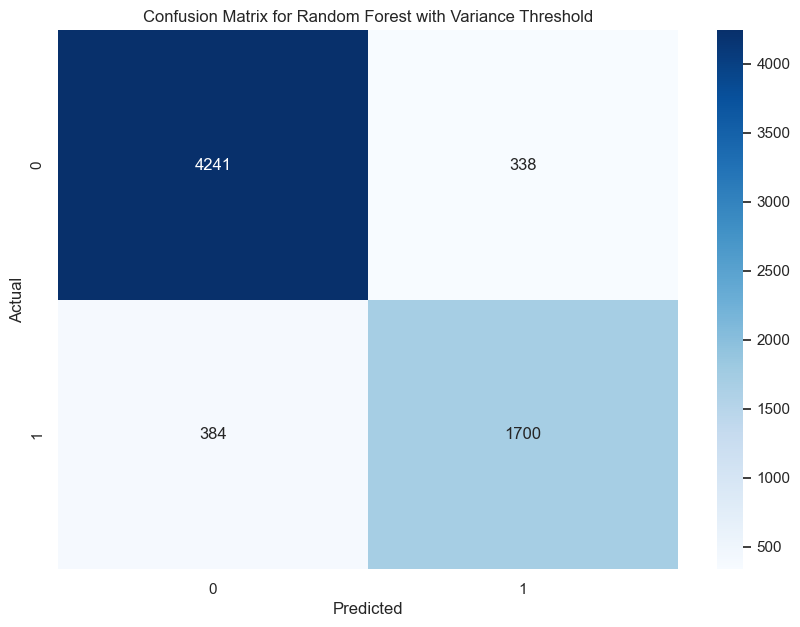

In [272]:
best_models = {}
best_scores = {}
for method, (X_tr, X_vl, X_te) in zip(feature_selection_methods,
                                      [(X_train_vt, X_val_vt, X_test_vt)]):
    print(f"\n\nFeature Selection Method: {method}\n" + "="*60 + "\n")
    for clf_name, clf in classifiers.items():
        print(f"Tuning hyperparameters for: {clf_name}")

        param_grid = param_grids[clf_name]
        random_search = RandomizedSearchCV(clf, param_grid, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
        random_search.fit(X_tr, y_train_res)

        best_models[clf_name] = random_search.best_estimator_

        # Evaluate on validation set
        val_score = random_search.score(X_vl, y_val)
        best_scores[clf_name] = val_score

        print(f"Best parameters for {clf_name}: {random_search.best_params_}")
        print(f"Validation accuracy for {clf_name}: {val_score}")
        print("\n" + "-"*60 + "\n")

    # Select the best model based on validation accuracy
    best_clf_name = max(best_scores, key=best_scores.get)
    best_clf = best_models[best_clf_name]

    print(f"Selected best classifier: {best_clf_name} with validation accuracy: {best_scores[best_clf_name]}")

    # Retrain the best model on the combined training and validation set
    best_clf.fit(np.vstack((X_tr, X_vl)), np.concatenate((y_train_res, y_val)))
     # Predict on the test set using the best model
    y_pred_best = best_clf.predict(X_te)

    # Print classification report and confusion matrix for the best model
    print(f"Best Classifier: {best_clf_name} with {method}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_best))
    cm_best = confusion_matrix(y_test, y_pred_best)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {best_clf_name} with {method}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [465]:
# Define the best parameters found for Gradient Boosting
best_params = {'n_estimators': 190, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 25}
best_clf =RandomForestClassifier(**best_params)
best_clf.fit(np.vstack((X_train_scaled, X_val_vt)), np.concatenate((y_train, y_val)))

RandomForestClassifier(max_depth=25, min_samples_split=7, n_estimators=190)

In [466]:
test_score = best_clf.score(X_test_vt,y_test)
print(f"Testing accuracy for Gradient Boosting with Variance Threshold: {test_score}")

Testing accuracy for Gradient Boosting with Variance Threshold: 0.895242383310821


In [467]:
import pickle

# Save the trained model using pickle
with open('best_gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

In [468]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [469]:
with open('selector.pkl', 'wb') as f:
    pickle.dump(vt_selector, f)